<a href="https://colab.research.google.com/github/mamon13303041/FIFA-World-Cups-Analysis/blob/main/FiFa_World_Cups_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Content**
--Data Cleaning
Visualization:

Most Number of World Cup Winning Title
Number of Goal Per Countary
Attendance, Number of Teams, Goals, and Matches per Cup
Goals Per Team Per World Cup
Matches With Heihest Number Of Attendance
Stadium with Highest Average Attendance
Which countries had won the cup ?
Number of goal per country
Match outcome by home and away temas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py


In [ ]:
world_cup_df=pd.read_csv('/content/sample_data/world_cups/WorldCups.csv')
world_cup_df.head(50)



In [ ]:
world_cup_players_df=pd.read_csv('/content/sample_data/world_cups/WorldCupPlayers.csv')
world_cup_players_df.head()

In [67]:
world_cup_matches_df=pd.read_csv('/content/sample_data/world_cups/WorldCupMatches.csv')

world_cup_matches_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Data cleaning

In [ ]:
world_cup_df.dropna(subset=['Year'], inplace = True)
world_cup_df.head()

In [68]:
world_cup_matches_df['Datetime']=pd.to_datetime(world_cup_matches_df['Datetime'])
world_cup_matches_df.dropna(subset=['Datetime','Year'], inplace = True)
world_cup_matches_df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [86]:
df=world_cup_df.replace(to_replace=["Germany FR","Estadio do Maracana"],
           value=["Germany","Maracan Stadium"])
df

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


Number of played matches of each teams

In [ ]:
team_df=world_cup_df.groupby(['Country'])['MatchesPlayed'].sum()
team_df.sort_values(ascending=False)


Winner of each country

In [87]:
winner_df=df['Winner'].value_counts()
winner_df

Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
England      1
France       1
Spain        1
Name: Winner, dtype: int64

In [ ]:
winner_df=df.groupby(['Year'])['Winner'].sum()
winner_df

Runner up and third postion

In [ ]:
runner_up_df=df['Runners-Up'].value_counts()
runner_up_df

In [ ]:
third_pos_df=df['Third'].value_counts()
third_pos_df

Merging winner, runner up and third postion df in DF

In [ ]:
merg_df=pd.concat([winner_df,runner_up_df,third_pos_df],axis=1)
merg_df.fillna(0, inplace=True)
merg_df

<Figure size 1296x576 with 0 Axes>

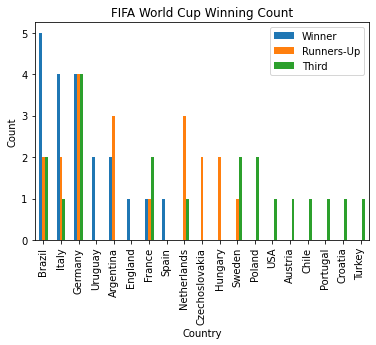

In [62]:
plt.figure(figsize=(18,8))
merg_df.plot(kind = 'bar', title='FIFA World Cup Winning Count')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

Total goals of each country

In [17]:
df=world_cup_matches_df.replace(to_replace=["Germany FR","Estadio do Maracana","Germany DR"],
           value=["Germany","Maracan Stadium","Germany"])


In [18]:
home_df=df[['Home Team Name','Home Team Goals']]

In [19]:
away_df=df[['Away Team Name','Away Team Goals']]

In [20]:
home_df.columns=['Countries', 'Goals']


In [21]:
away_df.columns=home_df.columns

In [22]:
goals_df=home_df.append(away_df,ignore_index = True)


In [ ]:
goals = goals_df.groupby('Countries').sum()
goals.sort_values(by='Goals',ascending=False)

<Figure size 1080x576 with 0 Axes>

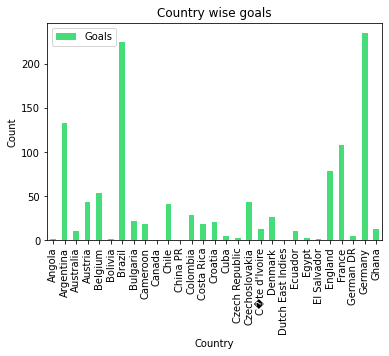

In [66]:
plt.figure(figsize=(15,8))
goals[1:30].plot(kind = 'bar',color='#4D7F', title='Country wise goals')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

Number of Teams, Goals, and Matches per Cup

Text(0.5, 1.0, 'Goals Scored by Teams Per Year')

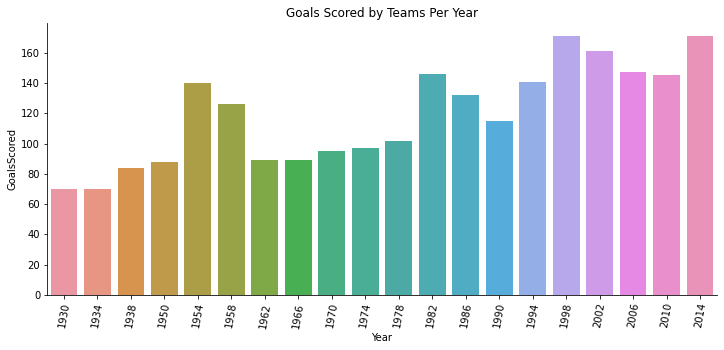

In [26]:
fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = world_cup_df[:24])
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')

Text(0.5, 1.0, 'QualifiedTeams Teams Per Year')

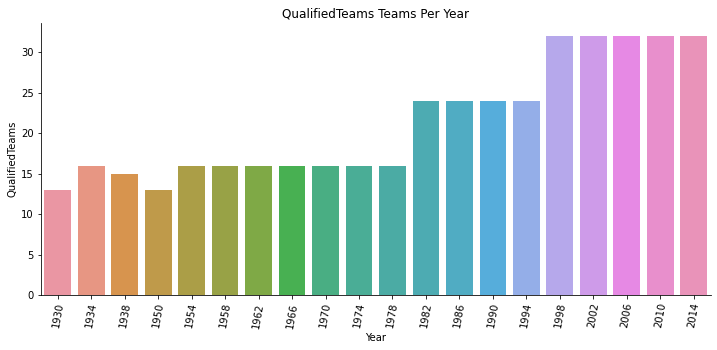

In [27]:
fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = world_cup_df)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('QualifiedTeams Teams Per Year')

Text(0.5, 1.0, 'Each Teams played Per World Cup Year')

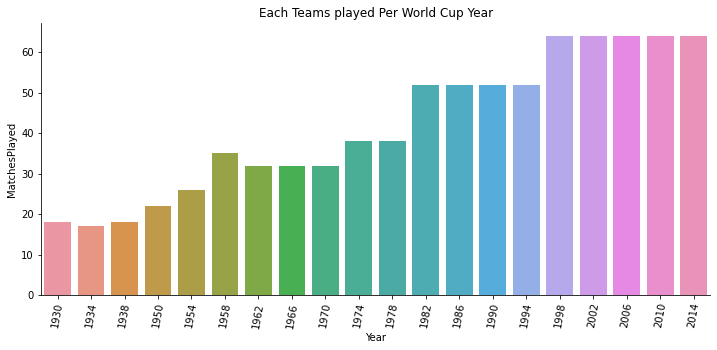

In [28]:
fig, ax = plt.subplots(figsize = (12,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = world_cup_df)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Each Teams played Per World Cup Year')

Each world cup per teams gols

In [29]:
home_goals=world_cup_matches_df.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home_goals

Year    Home Team Name            
1930.0  Argentina                     16.0
        Brazil                         4.0
        Chile                          4.0
        France                         4.0
        Paraguay                       1.0
                                      ... 
2014.0  Spain                          1.0
        Switzerland                    4.0
        USA                            2.0
        Uruguay                        3.0
        rn">Bosnia and Herzegovina     3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [30]:
away_goals=world_cup_matches_df.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away_goals

Year    Away Team Name            
1930.0  Argentina                     2.0
        Belgium                       0.0
        Bolivia                       0.0
        Brazil                        1.0
        Chile                         1.0
                                     ... 
2014.0  Spain                         3.0
        Switzerland                   3.0
        USA                           4.0
        Uruguay                       1.0
        rn">Bosnia and Herzegovina    1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [ ]:
cup_year_goals=pd.concat([home_goals,away_goals],axis=1)
cup_year_goals['Goals'] = cup_year_goals['Home Team Goals'] + cup_year_goals['Away Team Goals']
cup_year_goals = cup_year_goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
cup_year_goals

In [32]:
cup_year_goals=cup_year_goals.reset_index()

In [ ]:
cup_year_goals.columns = ['Year', 'Country', 'Goals']
cup_year_goals = cup_year_goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
cup_year_goals

Top 5 scored teams

In [ ]:
top_df=cup_year_goals.groupby(['Year'])
top_df.head()

Matches With Heihest Number Of Attendance


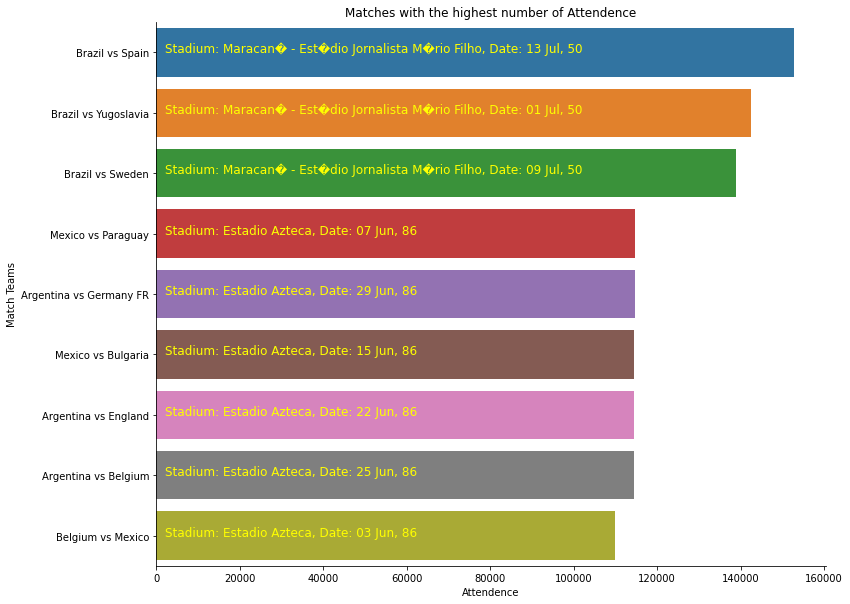

In [79]:
top10 = world_cup_matches_df.sort_values(by = 'Attendance', ascending = False)[1:10]
top10['vs'] = top10['Home Team Name'] + " vs " + top10['Away Team Name']

plt.figure(figsize = (12,10))

ax = sns.barplot(y = top10['vs'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Match Teams')
plt.xlabel('Attendence')
plt.title('Matches with the highest number of Attendence')

for i, s in enumerate("Stadium: " + top10['Stadium'] +", Date: " + top10['Datetime']):
    ax.text(2000, i, s, fontsize = 12, color = 'yellow')
plt.show()

Stadium with Highest Average Attendance

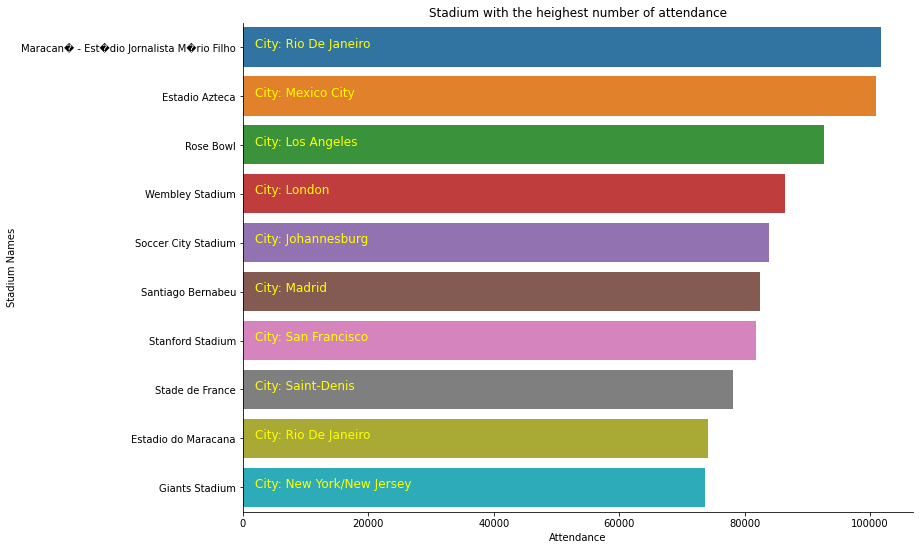

In [81]:
world_cup_matches_df['Year'] = world_cup_matches_df['Year'].astype(int)

std = world_cup_matches_df.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'yellow')
        
plt.show()

Matches outcome by home and away matches

In [97]:
def match_winning(world_cup_matches_df):
  if world_cup_matches_df['Home Team Goals']>world_cup_matches_df['Away Team Goals']:
    return 'win home team'
  elif world_cup_matches_df['Home Team Goals']<world_cup_matches_df['Away Team Goals']:
    return 'win away team'
  return 'Draw the match'


In [ ]:
world_cup_matches_df['Result']=world_cup_matches_df.apply(lambda x: match_winning(x), axis=1)

world_cup_matches_df.head()

In [ ]:
df=world_cup_matches_df['Result'].value_counts()
df

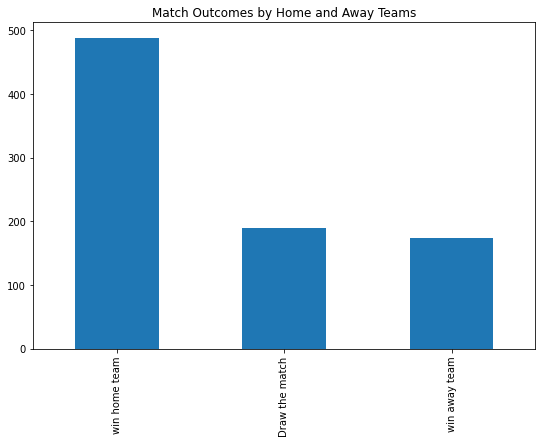

In [116]:
plt.figure(figsize = (9,6))

df.plot(kind='bar')
plt.title('Match Outcomes by Home and Away Teams')
plt.show()